<a href="https://colab.research.google.com/github/cy6253/DataAnalysis_For_OxidationFabrication/blob/main/FDC%26SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/FDC&SPC_for_Oxidation/

/content/drive/MyDrive/FDC&SPC_for_Oxidation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def fix_font():
    # From https://HC.Dle.pw, By Jinseo Kim
    # v1.0.0
    import os
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    os.system("apt-get install -y fonts-nanum")
    os.system("fc-cache -fv")
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    plt.rcParams['font.family'] = "NanumBarunGothic"
    plt.rcParams['axes.unicode_minus'] = False
           
fix_font()

# **Oxidation Fault Detection & Classification**

## **Data Preprocessing**

In [ ]:
Oxid = pd.read_csv("Oxid.csv")

In [ ]:
Oxid.describe() # Oxid_time에 이상치 존재

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000


In [ ]:
cond = Oxid["Oxid_time"] < 0
Oxid["Oxid_time"].loc[cond] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
Oxid.dropna(inplace = True) # 이상치 제거

In [ ]:
oxid = Oxid.drop(columns=["Ox_Chamber", "process", "Vapor", "No_Die", "Lot_Num", "Wafer_Num", "Datetime"]) # 필요 없는 columns 제거

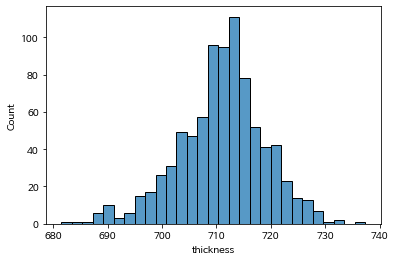

In [ ]:
sns.histplot(data = oxid, x = 'thickness')

In [ ]:
THK_mean = oxid['thickness'].mean()
THK_std = oxid['thickness'].std()

USL = THK_mean + (2*THK_std) # Upper Spec Limit
LSL = THK_mean - (2*THK_std) # Lower Spec Limit
# 공정 마진 = 2 시그마

In [ ]:
cond = ((oxid['thickness'] > USL) | (oxid['thickness'] < LSL)) # 후속 공정 진행 불가 조건

In [ ]:
oxid["Pass/Fail"] = True

In [ ]:
oxid["Pass/Fail"].loc[cond] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
oxid['Pass/Fail'].value_counts()
# Pass : 801
# Fail : 45

True     801
False     45
Name: Pass/Fail, dtype: int64

In [ ]:
# dry oxidation과 wet oxidation을 따로 분석
cond1 = oxid['type'] == 'dry'

Doxid = oxid.loc[cond1] # Dry
cond2 = Doxid['Pass/Fail'] == True
DPoxid = Doxid.loc[cond2] # Dry & Pass
DFoxid = Doxid.loc[~cond2] # Dry & Fail

Woxid = oxid.loc[~cond1] # Wet
cond3 = Woxid['Pass/Fail'] == True
WPoxid = Woxid.loc[cond3] # Wet & Pass
WFoxid = Woxid.loc[~cond3] # Wet & Fail

[Text(0.5, 1.0, 'Wet')]

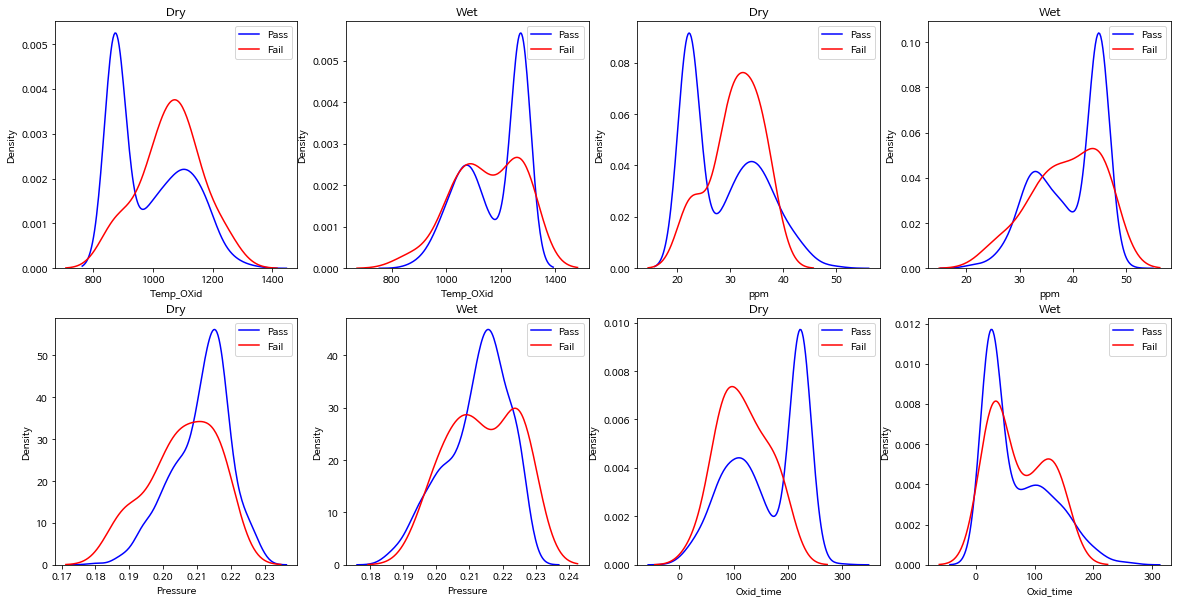

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
fig.set_size_inches(20,10)

sns.kdeplot(data = DPoxid, x = 'Temp_OXid', color = 'blue', legend = False, ax = ax1)
sns.kdeplot(data = DFoxid, x = 'Temp_OXid', color = 'red', legend = False, ax = ax1)
ax1.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPoxid, x = 'Temp_OXid', color = 'blue', legend = False, ax = ax2)
sns.kdeplot(data = WFoxid, x = 'Temp_OXid', color = 'red', legend = False, ax = ax2)
ax2.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPoxid, x = 'ppm', color = 'blue', legend = False, ax = ax3)
sns.kdeplot(data = DFoxid, x = 'ppm', color = 'red', legend = False, ax = ax3)
ax3.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPoxid, x = 'ppm', color = 'blue', legend = False, ax = ax4)
sns.kdeplot(data = WFoxid, x = 'ppm', color = 'red', legend = False, ax = ax4)
ax4.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPoxid, x = 'Pressure', color = 'blue', legend = False, ax = ax5)
sns.kdeplot(data = DFoxid, x = 'Pressure', color = 'red', legend = False, ax = ax5)
ax5.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPoxid, x = 'Pressure', color = 'blue', legend = False, ax = ax6)
sns.kdeplot(data = WFoxid, x = 'Pressure', color = 'red', legend = False, ax = ax6)
ax6.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPoxid, x = 'Oxid_time', color = 'blue', legend = False, ax = ax7)
sns.kdeplot(data = DFoxid, x = 'Oxid_time', color = 'red', legend = False, ax = ax7)
ax7.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPoxid, x = 'Oxid_time', color = 'blue', legend = False, ax = ax8)
sns.kdeplot(data = WFoxid, x = 'Oxid_time', color = 'red', legend = False, ax = ax8)
ax8.legend(labels=['Pass', 'Fail'])

ax1.set(title="Dry")
ax2.set(title="Wet")
ax3.set(title="Dry")
ax4.set(title="Wet")
ax5.set(title="Dry")
ax6.set(title="Wet")
ax7.set(title="Dry")
ax8.set(title="Wet")


## **Statistical Analysis**

In [ ]:
import scipy.stats as stats

[Text(0.5, 1.0, 'Time')]

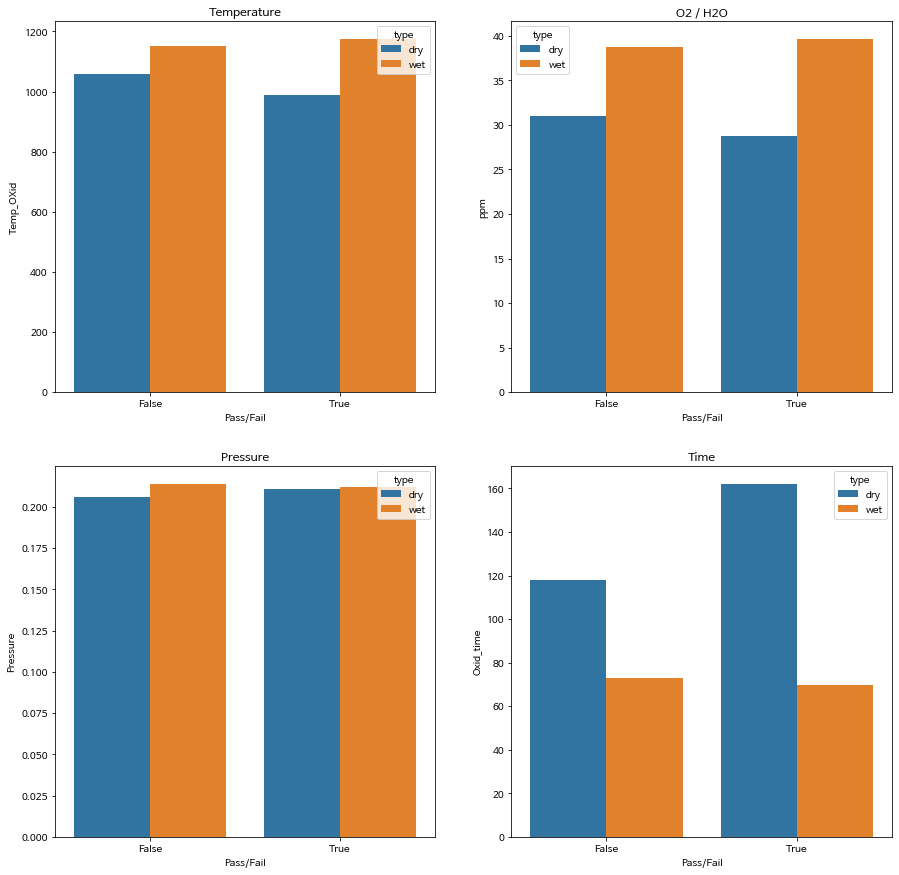

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15,15)

sns.barplot(data = oxid, x = 'Pass/Fail', y='Temp_OXid', hue = 'type', ax = ax1, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='ppm', hue = 'type', ax = ax2, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='Pressure', hue = 'type', ax = ax3, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='Oxid_time', hue = 'type', ax = ax4, ci=None)

ax1.set(title="Temperature")
ax2.set(title="O2 / H2O")
ax3.set(title="Pressure")
ax4.set(title="Time")

# 공정변수 별 
# 후속 공정 진행 여부에 따라 
# 유의미한 차이가 있는지 검증 필요

### **1) Temperature**

  1.   *Wet 공정에서 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# 온도가 정규분포를 띄는가?
# 귀무 가설 : 온도가 정규분포를 띈다
# 대립 가설 : 온도가 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=94.57998214249325, pvalue=2.8987971689618255e-21)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Temp_OXid'], wet_false['Temp_OXid'])
# P value > 0.05 -> 귀무가설 기각 실패 -> 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없다.

RanksumsResult(statistic=0.5042380072795749, pvalue=0.6140941349739748)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# 온도가 정규분포를 띄는가?
# 귀무 가설 : 온도가 정규분포를 띈다
# 대립 가설 : 온도가 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=238.6579665670551, pvalue=1.4999646664981524e-52)

In [ ]:
# 귀무 가설 : 추가 공정 여부에 따라 온도에 유의미한 차이가 없을 것이다.
# 대립 가설 : 추가 공정 여부에 따라 온도에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Temp_OXid'], dry_false['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 추가 공정 여부에 따라 온도에 유의미한 차이가 있다.

RanksumsResult(statistic=-2.4653474692890445, pvalue=0.013688044024934102)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있다.**



### **2) O2 / H2O ppm**
  1.   Wet 공정에서 추가 공정 여부에 따라 H2O ppm에 유의미한 차이가 있는지 검증 
  2.   Dry 공정에서 추가 공정 여부에 따라 O2  ppm에 유의미한 차이가 있는지 검증



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# ppm이 정규분포를 띄는가?
# 귀무 가설 : ppm이 정규분포를 띈다
# 대립 가설 : ppm이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['ppm'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=55.20384316860684, pvalue=1.0295270598771564e-12)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['ppm'], wet_false['ppm'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.

RanksumsResult(statistic=-0.13184204777493475, pvalue=0.8951092275084526)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# ppm이 정규분포를 띄는가?
# 귀무 가설 : ppm이 정규분포를 띈다
# 대립 가설 : ppm이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['ppm'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=111.71734286270353, pvalue=5.506646920206479e-25)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['ppm'], dry_false['ppm'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.

RanksumsResult(statistic=-1.9392929343196406, pvalue=0.05246567876711466)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.**



### **3) Pressure**

  1.   *Wet 공정에서 추가 공정 여부에 따라 압력에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 추가 공정 여부에 따라 압력에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# Pressure가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Pressure'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=19.922978503796703, pvalue=4.7182417191754426e-05)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Pressure'], wet_false['Pressure'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없다.

RanksumsResult(statistic=-0.8095564337057396, pvalue=0.41819515585128597)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # dry data

In [ ]:
# Pressure가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Pressure'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=29.01780101128255, pvalue=4.998786311742481e-07)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Pressure'], dry_false['Pressure'])
# P value < 0.05 -> 대립가설 참 -> 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있다.

RanksumsResult(statistic=2.5101331932121154, pvalue=0.012068563133817146)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 pressure에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 pressure에 유의미한 차이가 있다.**



### **4) Time**

  1.   *Wet 공정에서 추가 공정 여부에 따라 시간에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 추가 공정 여부에 따라 시간에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# 공정 시간이 정규분포를 띄는가?
# 귀무 가설 : 시간이 정규분포를 띈다
# 대립 가설 : 시간이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=38.44024753527178, pvalue=4.495792994174862e-09)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Oxid_time'], wet_false['Oxid_time'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없다.

RanksumsResult(statistic=-1.4155672497940361, pvalue=0.156902245722812)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# Time가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=523.2954515054824, pvalue=2.3325797608294977e-114)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Oxid_time'], dry_false['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있다.

RanksumsResult(statistic=3.3894973280190785, pvalue=0.000700208912761338)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 있다.**



###**결론**

*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 pressure에 유의미한 차이가 있다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 있다.** 


## **Machine Learning**

### **Statistical Analysis**
**Pass/Fail Imbalance 때문에 데이터를 증강하여 분석하고자 함**

In [ ]:
onehot_type = pd.get_dummies(oxid['type']) # one-hot encoding for type

In [ ]:
train = pd.concat([oxid, onehot_type], axis = 1)
train.drop(columns=['type'], inplace = True)

In [ ]:
X = train.drop(columns = ['thickness', 'Pass/Fail'])
Y = train['Pass/Fail']

In [ ]:
from imblearn.over_sampling import ADASYN # Over sampling
X_over, Y_over = ADASYN().fit_resample(X, Y) # Over sampling (ADASYN)

In [ ]:
Data_over = X_over
Data_over['Pass/Fail'] = Y_over
Data_over
Data_over['Pass/Fail'].value_counts()
# 기존 데이터
# True : 801
# False :45
# 증강 데이터
# True : 801
# False : 816

False    816
True     801
Name: Pass/Fail, dtype: int64

In [ ]:
cond1 = Data_over['dry'] == 1.0
DData_over = Data_over.loc[cond1] # Dry data
WData_over = Data_over.loc[~cond1] # Wet data

cond2 = DData_over['Pass/Fail'] == 1.0
DPData_over = DData_over.loc[cond2]
DFData_over = DData_over.loc[~cond2]

cond3 = WData_over['Pass/Fail'] == 1.0
WPData_over = WData_over.loc[cond3]
WFData_over = WData_over.loc[~cond3]

[Text(0.5, 1.0, 'Wet')]

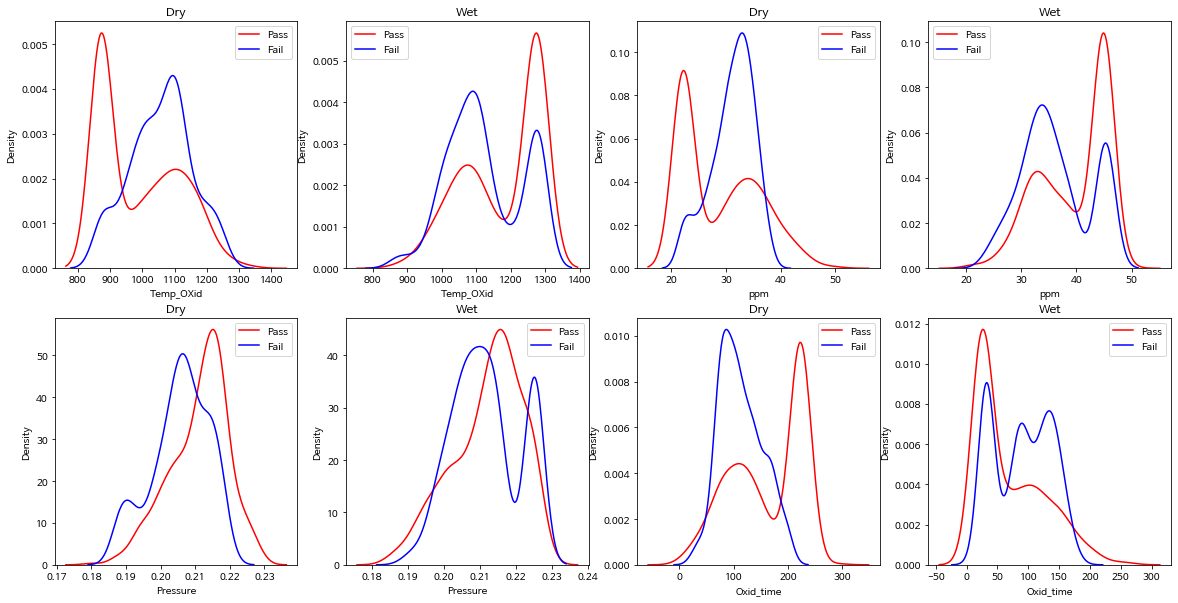

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
fig.set_size_inches(20,10)

sns.kdeplot(data = DPData_over, x = 'Temp_OXid', color = 'red', legend = False, ax = ax1)
sns.kdeplot(data = DFData_over, x = 'Temp_OXid', color = 'blue', legend = False, ax = ax1)
ax1.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPData_over, x = 'Temp_OXid', color = 'red', legend = False, ax = ax2)
sns.kdeplot(data = WFData_over, x = 'Temp_OXid', color = 'blue', legend = False, ax = ax2)
ax2.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPData_over, x = 'ppm', color = 'red', legend = False, ax = ax3)
sns.kdeplot(data = DFData_over, x = 'ppm', color = 'blue', legend = False, ax = ax3)
ax3.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPData_over, x = 'ppm', color = 'red', legend = False, ax = ax4)
sns.kdeplot(data = WFData_over, x = 'ppm', color = 'blue', legend = False, ax = ax4)
ax4.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPData_over, x = 'Pressure', color = 'red', legend = False, ax = ax5)
sns.kdeplot(data = DFData_over, x = 'Pressure', color = 'blue', legend = False, ax = ax5)
ax5.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPData_over, x = 'Pressure', color = 'red', legend = False, ax = ax6)
sns.kdeplot(data = WFData_over, x = 'Pressure', color = 'blue', legend = False, ax = ax6)
ax6.legend(labels=['Pass', 'Fail'])

sns.kdeplot(data = DPData_over, x = 'Oxid_time', color = 'red', legend = False, ax = ax7)
sns.kdeplot(data = DFData_over, x = 'Oxid_time', color = 'blue', legend = False, ax = ax7)
ax7.legend(labels=['Pass', 'Fail'])
sns.kdeplot(data = WPData_over, x = 'Oxid_time', color = 'red', legend = False, ax = ax8)
sns.kdeplot(data = WFData_over, x = 'Oxid_time', color = 'blue', legend = False, ax = ax8)
ax8.legend(labels=['Pass', 'Fail'])

ax1.set(title="Dry")
ax2.set(title="Wet")
ax3.set(title="Dry")
ax4.set(title="Wet")
ax5.set(title="Dry")
ax6.set(title="Wet")
ax7.set(title="Dry")
ax8.set(title="Wet")

In [ ]:
cond = Data_over['dry'] == 1
Data_over.loc[cond, 'type'] = 'dry'
Data_over.loc[~cond, 'type'] = 'wet'
Data_over = Data_over.drop(columns = ['dry', 'wet'])

oxid_over = Data_over

[Text(0.5, 1.0, 'Time')]

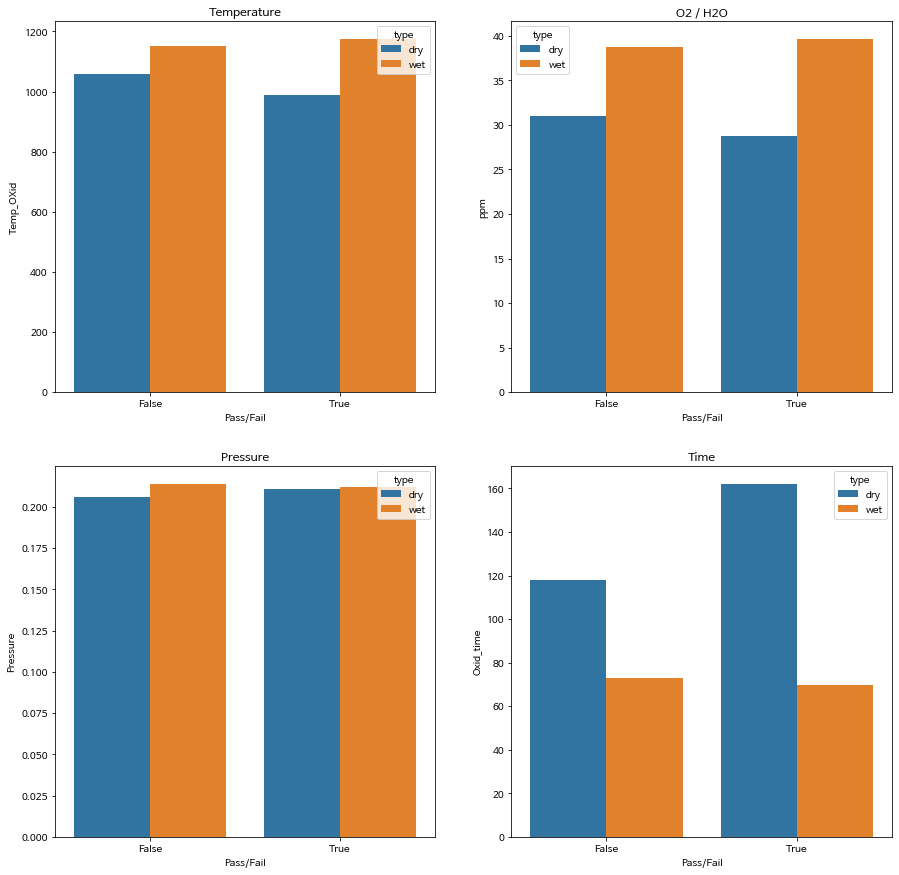

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15,15)

sns.barplot(data = oxid, x = 'Pass/Fail', y='Temp_OXid', hue = 'type', ax = ax1, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='ppm', hue = 'type', ax = ax2, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='Pressure', hue = 'type', ax = ax3, ci=None)
sns.barplot(data = oxid, x = 'Pass/Fail', y='Oxid_time', hue = 'type', ax = ax4, ci=None)

ax1.set(title="Temperature")
ax2.set(title="O2 / H2O")
ax3.set(title="Pressure")
ax4.set(title="Time")

# 공정변수 별 
# 후속 공정 진행 여부에 따라 
# 유의미한 차이가 있는지 검증 필요

#### **1) Temperature**

  1.   *Wet 공정에서 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# 온도가 정규분포를 띄는가?
# 귀무 가설 : 온도가 정규분포를 띈다
# 대립 가설 : 온도가 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=94.57998214249325, pvalue=2.8987971689618255e-21)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Temp_OXid'], wet_false['Temp_OXid'])
# P value > 0.05 -> 귀무가설 기각 실패 -> 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없다.

RanksumsResult(statistic=0.5042380072795749, pvalue=0.6140941349739748)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# 온도가 정규분포를 띄는가?
# 귀무 가설 : 온도가 정규분포를 띈다
# 대립 가설 : 온도가 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=238.6579665670551, pvalue=1.4999646664981524e-52)

In [ ]:
# 귀무 가설 : 추가 공정 여부에 따라 온도에 유의미한 차이가 없을 것이다.
# 대립 가설 : 추가 공정 여부에 따라 온도에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Temp_OXid'], dry_false['Temp_OXid'])
# P value < 0.05 -> 대립가설 참 -> 추가 공정 여부에 따라 온도에 유의미한 차이가 있다.

RanksumsResult(statistic=-2.4653474692890445, pvalue=0.013688044024934102)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 온도에 유의미한 차이가 있다.**



#### **2) O2 / H2O ppm**
  1.   Wet 공정에서 추가 공정 여부에 따라 H2O ppm에 유의미한 차이가 있는지 검증 
  2.   Dry 공정에서 추가 공정 여부에 따라 O2  ppm에 유의미한 차이가 있는지 검증



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# ppm이 정규분포를 띄는가?
# 귀무 가설 : ppm이 정규분포를 띈다
# 대립 가설 : ppm이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['ppm'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=55.20384316860684, pvalue=1.0295270598771564e-12)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['ppm'], wet_false['ppm'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.

RanksumsResult(statistic=-0.13184204777493475, pvalue=0.8951092275084526)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# ppm이 정규분포를 띄는가?
# 귀무 가설 : ppm이 정규분포를 띈다
# 대립 가설 : ppm이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['ppm'])
# P value < 0.05 -> 대립가설 참 -> 온도가 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=111.71734286270353, pvalue=5.506646920206479e-25)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['ppm'], dry_false['ppm'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 있다.

RanksumsResult(statistic=-1.9392929343196406, pvalue=0.05246567876711466)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 ppm에 유의미한 차이가 없다.**



#### **3) Pressure**

  1.   *Wet 공정에서 추가 공정 여부에 따라 압력에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 추가 공정 여부에 따라 압력에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# Pressure가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Pressure'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=19.922978503796703, pvalue=4.7182417191754426e-05)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Pressure'], wet_false['Pressure'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없다.

RanksumsResult(statistic=-0.8095564337057396, pvalue=0.41819515585128597)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # dry data

In [ ]:
# Pressure가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Pressure'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=29.01780101128255, pvalue=4.998786311742481e-07)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Pressure'], dry_false['Pressure'])
# P value < 0.05 -> 대립가설 참 -> 후속 공정 진행 여부에 따라 압력에 유의미한 차이가 있다.

RanksumsResult(statistic=2.5101331932121154, pvalue=0.012068563133817146)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 pressure에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 pressure에 유의미한 차이가 있다.**



#### **4) Time**

  1.   *Wet 공정에서 추가 공정 여부에 따라 시간에 유의미한 차이가 있는지 검증*
  2.   *Dry 공정에서 추가 공정 여부에 따라 시간에 유의미한 차이가 있는지 검증*



In [ ]:
cond1 = oxid['type'] == 'wet'

oxid_wet = oxid.loc[cond1] # Wet data

In [ ]:
# 공정 시간이 정규분포를 띄는가?
# 귀무 가설 : 시간이 정규분포를 띈다
# 대립 가설 : 시간이 정규분포를 띄지 않는다.
stats.normaltest(oxid_wet['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=38.44024753527178, pvalue=4.495792994174862e-09)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있을 것이다.
cond1 = oxid_wet['Pass/Fail'] == True

wet_true  = oxid_wet.loc[cond1]
wet_false = oxid_wet.loc[~cond1]

stats.ranksums(wet_true['Oxid_time'], wet_false['Oxid_time'])
# P value > 0.05 -> 귀무 가설 기각 실패 -> 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없다.

RanksumsResult(statistic=-1.4155672497940361, pvalue=0.156902245722812)

In [ ]:
cond1 = oxid['type'] == 'dry'

oxid_dry = oxid.loc[cond1] # Dry data

In [ ]:
# Time가 정규분포를 띄는가?
# 귀무 가설 : 압력이 정규분포를 띈다
# 대립 가설 : 압력이 정규분포를 띄지 않는다.
stats.normaltest(oxid_dry['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> ppm이 정규분포를 띄지 않는다.
# ==> 비모수적 검정

NormaltestResult(statistic=523.2954515054824, pvalue=2.3325797608294977e-114)

In [ ]:
# 귀무 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 없을 것이다.
# 대립 가설 : 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있을 것이다.
cond1 = oxid_dry['Pass/Fail'] == True

dry_true  = oxid_dry.loc[cond1]
dry_false = oxid_dry.loc[~cond1]

stats.ranksums(dry_true['Oxid_time'], dry_false['Oxid_time'])
# P value < 0.05 -> 대립가설 참 -> 후속 공정 진행 여부에 따라 시간에 유의미한 차이가 있다.

RanksumsResult(statistic=3.3894973280190785, pvalue=0.000700208912761338)



*   **Wet Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 없다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 있다.**



###**결론**

*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Temperature에 유의미한 차이가 있다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Pressure에 유의미한 차이가 있다.**
*   **Dry Oxidation의 경우, 후속 공정 진행 여부에 따라 Time에 유의미한 차이가 있다.** 


### **LightGBM**

In [ ]:
onehot_type_over = pd.get_dummies(oxid_over['type']) # one-hot encoding for type

In [ ]:
train = pd.concat([oxid_over, onehot_type_over], axis = 1) # 데이터 세트
train.drop(columns=['type'], inplace = True)

In [ ]:
cond = train['Pass/Fail'] == True
train.loc[cond, 'Target'] = 1
train.loc[~cond, 'Target'] = 0

In [ ]:
X = train.drop(columns = ['Pass/Fail', 'Target'])
Y = train['Target']

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from hyperopt import hp
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, Trials

lgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'n_estimators':hp.quniform('n_estimators', 500, 1000, 100),
                    'num_leaves':hp.quniform('num_leaves', 50, 150, 10),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)}

In [ ]:
def objective_func(search_space):
    
    model = LGBMClassifier(n_estimators=int(search_space['n_estimators']), 
                           max_depth=int(search_space['max_depth']),
                           num_leaves=int(search_space['num_leaves']),
                           colsample_bytree=search_space['colsample_bytree'], 
                           eval_metric='logloss')
    
    score = cross_val_score(model, X_train, Y_train, scoring='f1', cv=3)
        
    return {'loss':-1 * np.mean(score), 'status': STATUS_OK}

In [ ]:
trial_val = Trials()
best = fmin(fn=objective_func,
            space=lgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trial_val)
print('best:', best)

100%|██████████| 50/50 [01:02<00:00,  1.26s/it, best loss: -0.9014119789581256]
best: {'colsample_bytree': 0.7330483655816262, 'max_depth': 16.0, 'n_estimators': 1000.0, 'num_leaves': 110.0}


In [ ]:
best_model = LGBMClassifier(n_estimators=int(best['n_estimators']), colsample_bytree=round(best['colsample_bytree'], 5), 
                            max_depth=int(best['max_depth']), num_leaves=int(best['num_leaves'])
                           )

best_model.fit(X_train, Y_train)

LGBMClassifier(colsample_bytree=0.73305, max_depth=16, n_estimators=1000,
               num_leaves=110)

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred  = best_model.predict(X_test)

In [ ]:
print(classification_report(Y_train, Y_train_pred))
print('-----------------------------------------------------')
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       650
         1.0       1.00      1.00      1.00       643

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293

-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       166
         1.0       0.96      0.97      0.96       158

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324



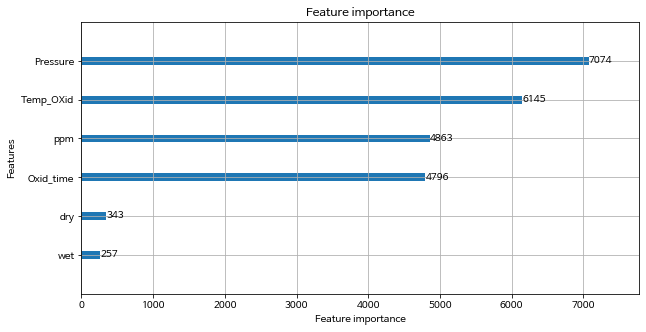

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(best_model, ax=ax)
# ML이 데이터를 분류하는 데 있어 중요했던 Features

###**결론**

*   M**L이 데이터를 분류하는 데 있어 중요하게 선택한 공정변수와 통계적으로 분석한 공정변수가 동일함을 확인**
